## Importing Libraries

In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Reading Dataset

In [2]:
df=pd.read_csv("C:/Users/Vishali Manivannan/Desktop/predictive_maintenance.csv")

In [3]:
df.head()

date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/15  S1F01085        0  215630672       56        0       52        6   
1  1/1/15  S1F0166B        0   61370680        0        3        0        6   
2  1/1/15  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/15  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/15  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9  
0   407438        0        0        7  
1   403174        0        0        0  
2   237394        0        0        0  
3   410186        0        0        0  
4   313173        0        0        3

In [4]:
df.tail()

date    device  failure    metric1  metric2  metric3  metric4  \
124489  11/2/15  Z1F0MA1S        0   18310224        0        0        0   
124490  11/2/15  Z1F0Q8RT        0  172556680       96      107        4   
124491  11/2/15  Z1F0QK05        0   19029120     4832        0        0   
124492  11/2/15  Z1F0QL3N        0  226953408        0        0        0   
124493  11/2/15  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  
124489       10   353705        8        8        0  
124490       11   332792        0        0       13  
124491       11   350410        0        0        0  
124492       12   358980        0        0        0  
124493       10   351431        0        0        0

In [5]:
df.shape

(124494, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date       124494 non-null object
device     124494 non-null object
failure    124494 non-null int64
metric1    124494 non-null int64
metric2    124494 non-null int64
metric3    124494 non-null int64
metric4    124494 non-null int64
metric5    124494 non-null int64
metric6    124494 non-null int64
metric7    124494 non-null int64
metric8    124494 non-null int64
metric9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.describe()

failure       metric1        metric2        metric3  \
count  124494.000000  1.244940e+05  124494.000000  124494.000000   
mean        0.000851  1.223881e+08     159.484762       9.940455   
std         0.029167  7.045933e+07    2179.657730     185.747321   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%         0.000000  6.128476e+07       0.000000       0.000000   
50%         0.000000  1.227974e+08       0.000000       0.000000   
75%         0.000000  1.833096e+08       0.000000       0.000000   
max         1.000000  2.441405e+08   64968.000000   24929.000000   

             metric4        metric5        metric6        metric7  \
count  124494.000000  124494.000000  124494.000000  124494.000000   
mean        1.741120      14.222669  260172.657726       0.292528   
std        22.908507      15.943028   99151.078547       7.436924   
min         0.000000       1.000000       8.000000       0.000000   
25%         0.000000       8.000000  221452.000000       0.000000   
50%         0.000000      10.000000  249799.500000       0.000000   
75%         0.000000      12.000000  310266.000000       0.000000   
max      1666.000000      98.000000  689161.000000     832.000000   

             metric8        metric9  
count  124494.000000  124494.000000  
mean        0.292528      12.451524  
std         7.436924     191.425623  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max       832.000000   18701.000000

In [8]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [9]:
df[df["failure"]==1].count()

date       106
device     106
failure    106
metric1    106
metric2    106
metric3    106
metric4    106
metric5    106
metric6    106
metric7    106
metric8    106
metric9    106
dtype: int64

In [10]:
df[df["failure"]==0].count()

date       124388
device     124388
failure    124388
metric1    124388
metric2    124388
metric3    124388
metric4    124388
metric5    124388
metric6    124388
metric7    124388
metric8    124388
metric9    124388
dtype: int64

In [11]:
from datetime import datetime
data = [go.Scatter(x=df.date, y=df["failure"])]

py.iplot(data, filename = 'time-series-simple')

In [12]:
X=df.drop(["failure","device"],axis=1)
y=df.failure

In [13]:
X.shape

(124494, 10)

In [14]:
y.shape

(124494,)

In [15]:
import datetime as dt
X['date'] = pd.to_datetime(X['date'])
X['date']=X['date'].map(dt.datetime.toordinal)

X['date'].head()

0    735599
1    735599
2    735599
3    735599
4    735599
Name: date, dtype: int64

## Splitting dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=60,test_size=0.20)

In [18]:
print(X_train.shape)
print(X_test.shape)

(99595, 10)
(24899, 10)


In [19]:
print(y_train.shape)
print(y_test.shape)

(99595,)
(24899,)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



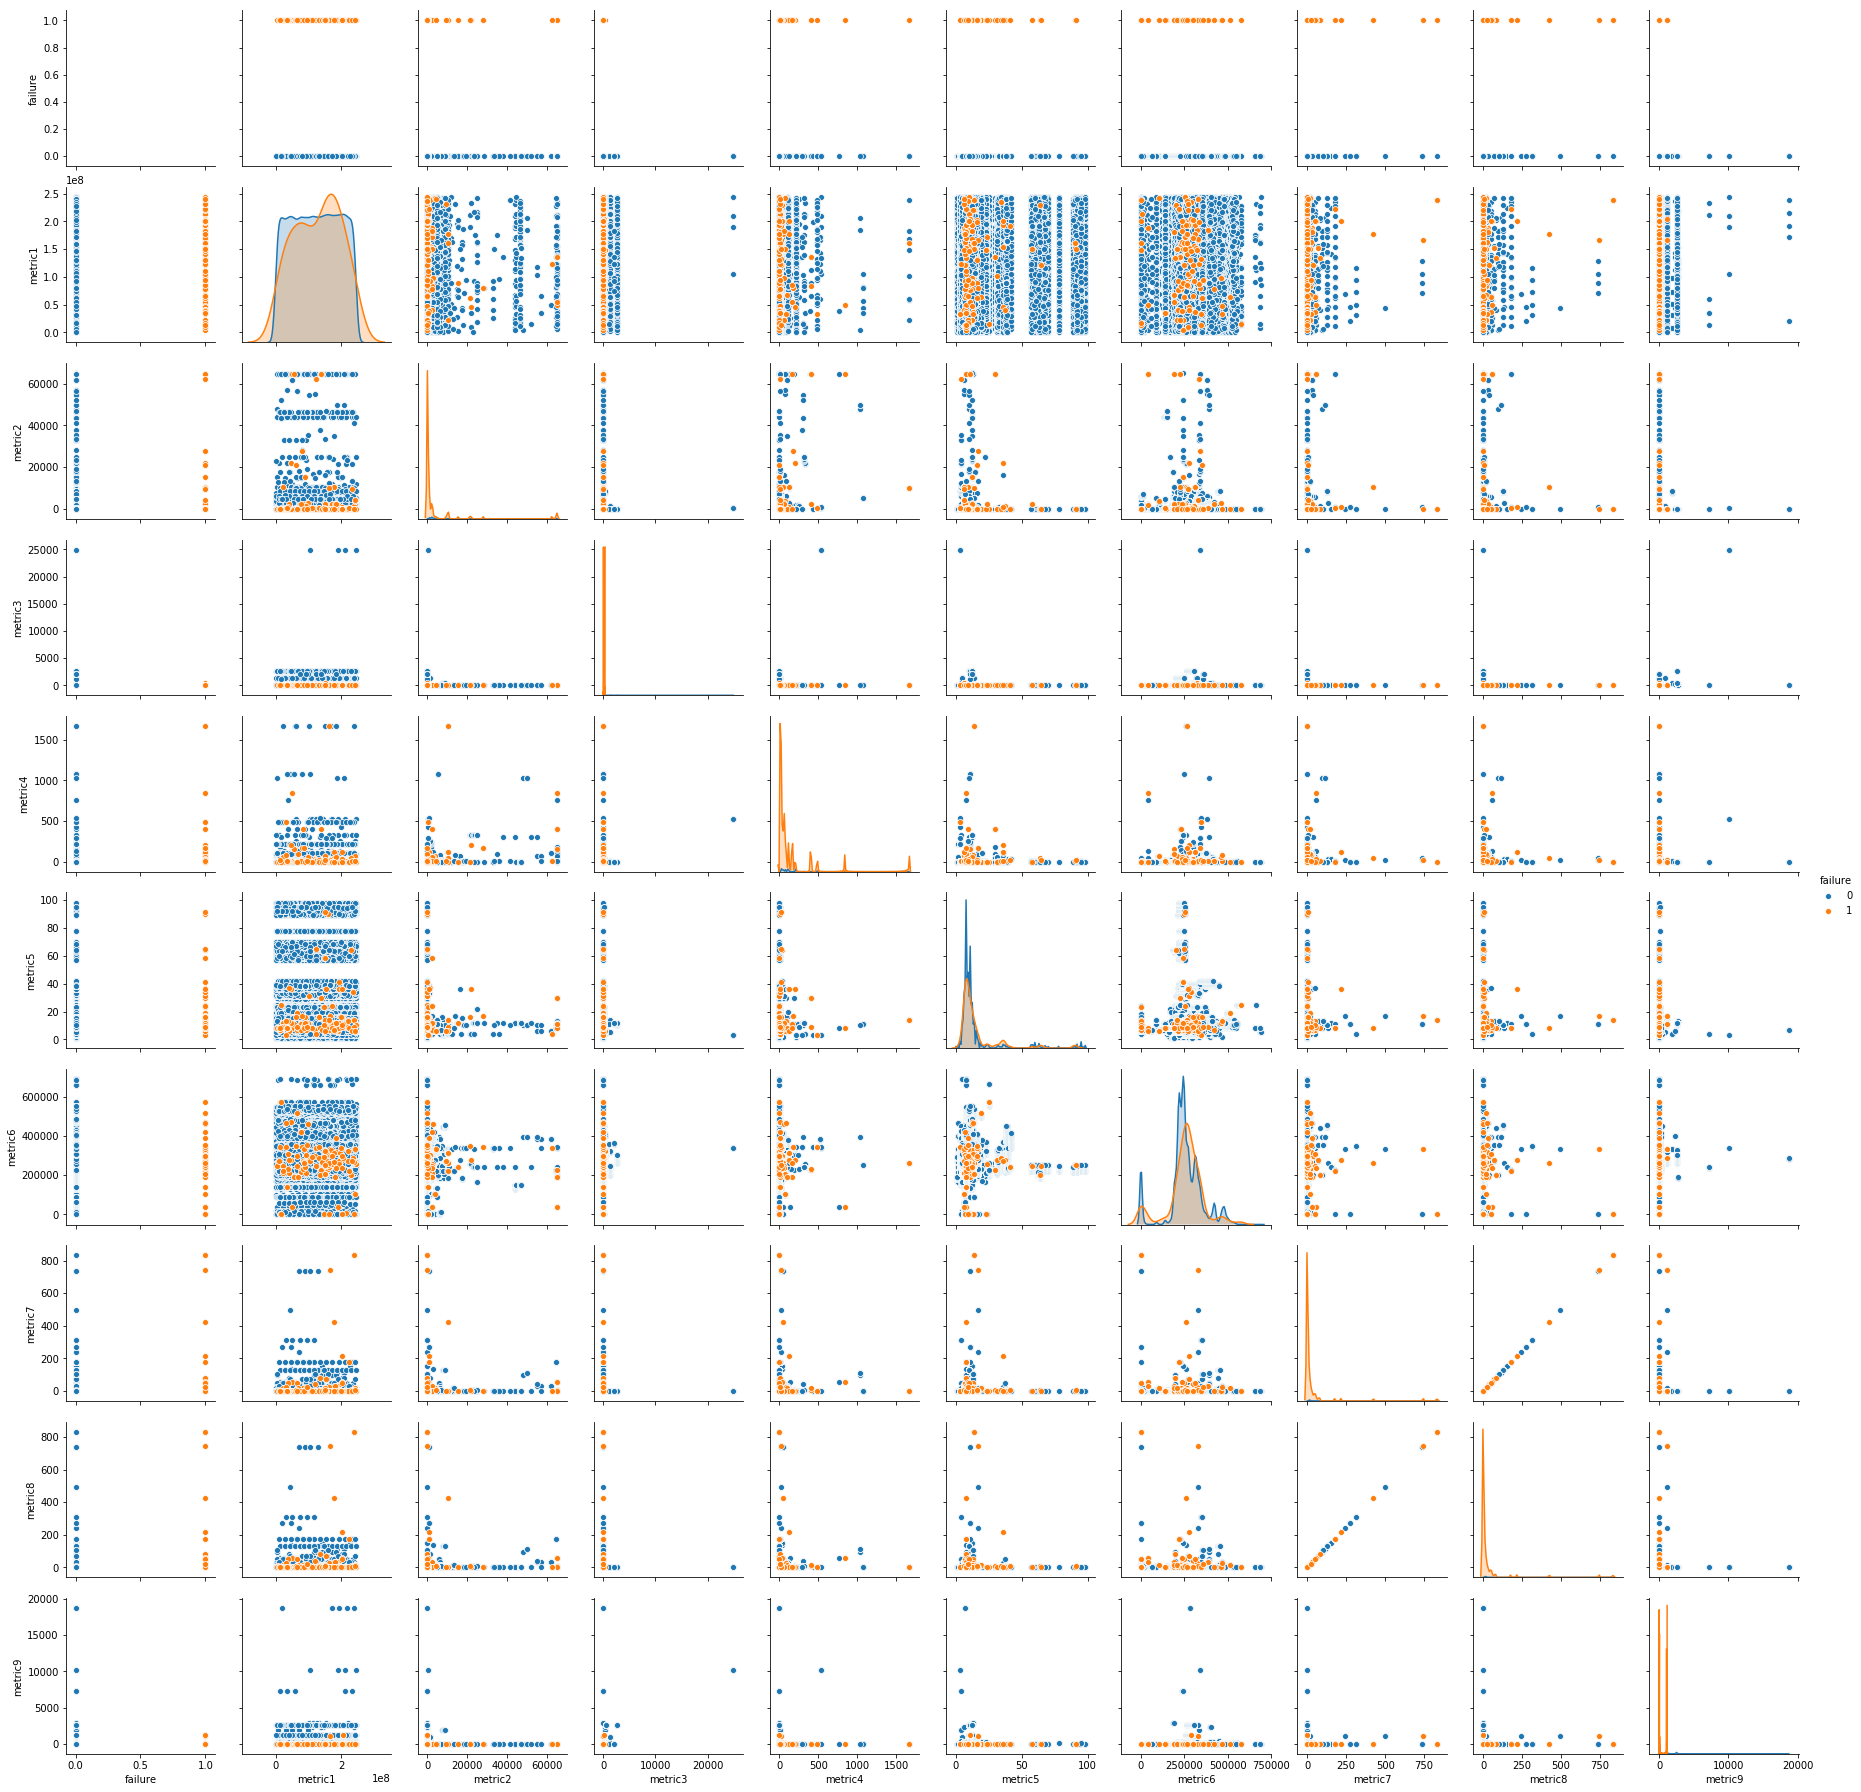

In [20]:
pp = sns.pairplot(df,hue="failure")

In [23]:
k_range = range(1,30)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train) #Applying KNN to the training set
    y_pred=knn.predict(X_test) #Predicting the test set results
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'accuracy')

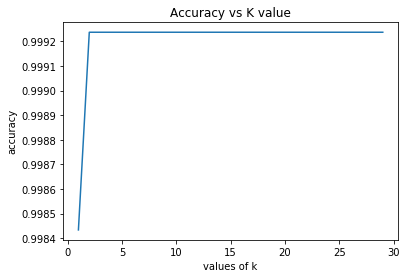

In [38]:
plt.plot(k_range,scores_list)
plt.title("Accuracy vs K value")
plt.xlabel("values of k")
plt.ylabel("accuracy") # Accuracy is 99.92%